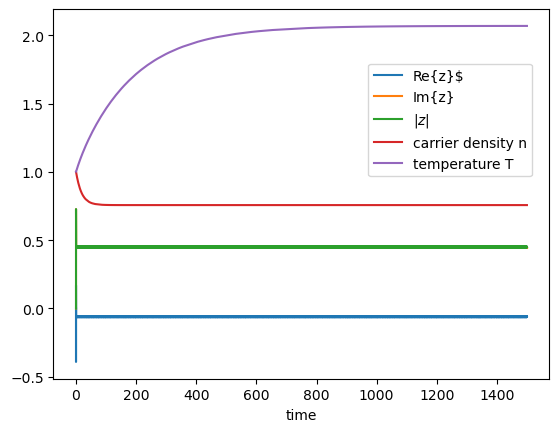

In [149]:
from scipy.integrate import complex_ode
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
#import cmath
import math

def CMT3(t,Y,Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta):
    z = Y[0]
    n = Y[1]
    T = Y[2]
    dzdt = -(k_T/2+1j*(Delta+chi*abs(z)**2))*z-math.sqrt(k)*u 
    +1j*(n+sigma_FCD*n**0.8-T)*z - (gamma_TPA*abs(z)**2+gamma_FCA*n)*z
    dndt = abs(z)**4-n/tau
    dTdt = xi_T*abs(z)**2*(eta_lin*eta_c + 2*gamma_TPA*abs(z)**2 + 2*gamma_FCA*n) - T/tao_theta
    return [dzdt, dndt, dTdt]

chi = 0.55
tau=18.5
k_l=50 * abs(chi)
k = 150 * abs(chi)
k_T=k+k_l
Delta_th= -math.sqrt(3)/2.0 * k_T
gamma_TPA=0.11
gamma_FCA=0.2
sigma_FCD=7.2

xi_T=0.074;
eta_lin=0.4;
eta_c=1;
tao_theta=185;

# choose Delta and set the range of imput pump amplitude 
Delta=400
# initial points 
y0 = [0+0j, 1+0j,1]
t_span=[0,1500]

# test 
u=20
m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
sol=solve_ivp(CMT3, t_span, y0, args=m)
plt.plot(sol.t, sol.y[0,:].real,label='Re{z}$')
plt.plot(sol.t, sol.y[0,:].imag,label='Im{z}')
plt.plot(sol.t, abs(sol.y[0,:]),label='$|z|$')
plt.plot(sol.t, sol.y[1,:],label='carrier density n')
plt.plot(sol.t, sol.y[2,:],label='temperature T')
plt.xlabel('time')
plt.legend(loc='center', bbox_to_anchor=(0.8, 0.7))
plt.show()


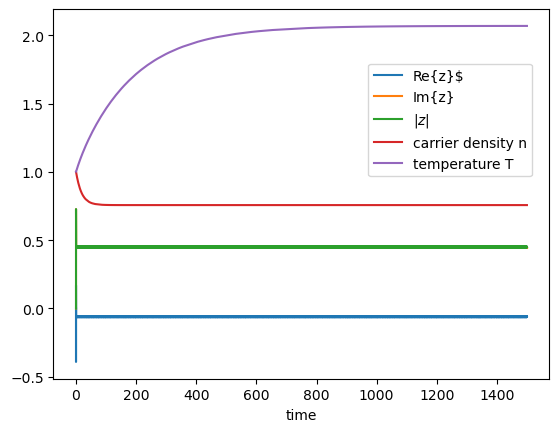

In [151]:
plt.plot(sol.t, sol.y[0,:].real,label='Re{z}$')
plt.plot(sol.t, sol.y[0,:].imag,label='Im{z}')
plt.plot(sol.t, abs(sol.y[0,:]),label='$|z|$')
plt.plot(sol.t, sol.y[1,:],label='carrier density n')
plt.plot(sol.t, sol.y[2,:],label='temperature T')
plt.xlabel('time')
plt.legend(loc='center', bbox_to_anchor=(0.8, 0.7))
plt.show()

As we see above, the |z| comes to equilibrium first within time span(0,1), then n converges before 200. Finally, T converges until around 1400. So we now observe them separately. 

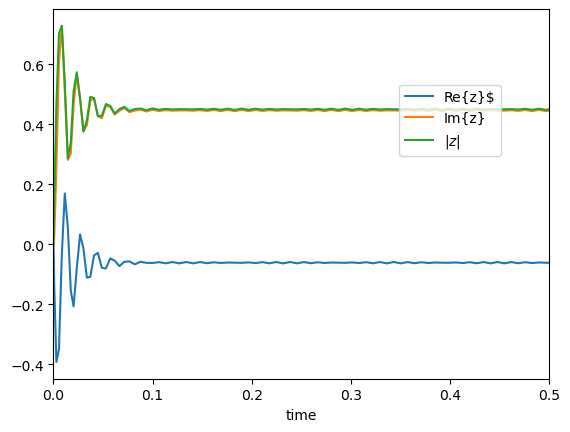

In [154]:
plt.plot(sol.t, sol.y[0,:].real,label='Re{z}$')
plt.plot(sol.t, sol.y[0,:].imag,label='Im{z}')
plt.plot(sol.t, abs(sol.y[0,:]),label='$|z|$')
plt.xlim(0,0.5)
plt.xlabel('time')
plt.legend(loc='center', bbox_to_anchor=(0.8, 0.7))
plt.show()

The stable n is (0.7566415493946538+0j).


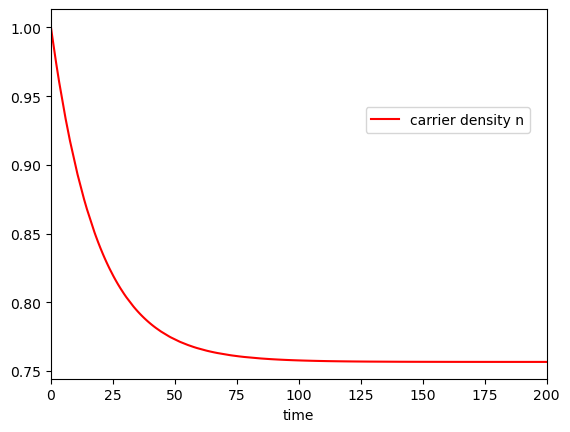

In [156]:
print('The stable n is {}.'.format(sol.y[1,-1]))
plt.plot(sol.t, sol.y[1,:],'r',label='carrier density n')
plt.xlim(0,200)
plt.xlabel('time')
plt.legend(loc='center', bbox_to_anchor=(0.8, 0.7))
plt.show()

The stable T is (2.068621163870276+0j).


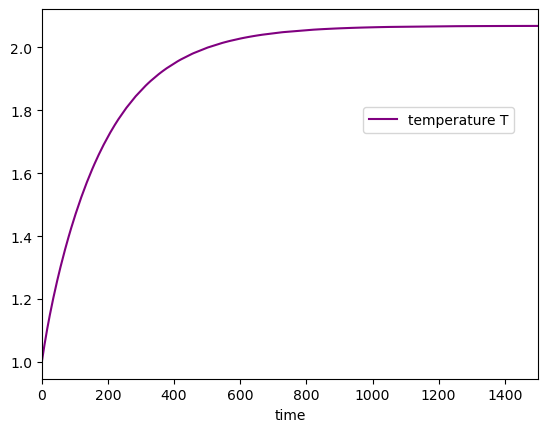

In [158]:
print('The stable T is {}.'.format(sol.y[2,-1]))
plt.plot(sol.t, sol.y[2,:],color='purple',label='temperature T')
plt.xlim(0,1500)
plt.xlabel('time')
plt.legend(loc='center', bbox_to_anchor=(0.8, 0.7))
plt.show()

Text(0, 0.5, '$E=|z|^2$')

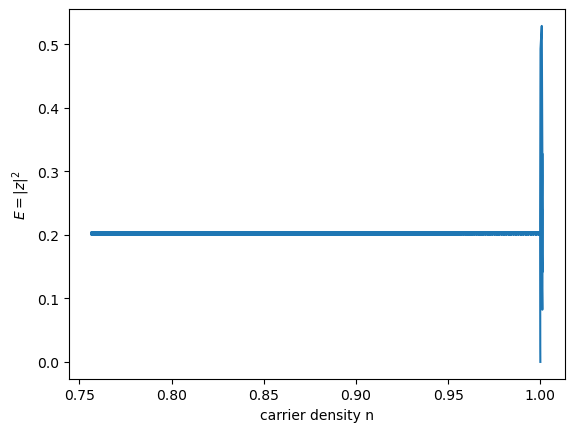

In [160]:
plt.plot(sol.y[1,:],abs(sol.y[0,:])**2)  # n vs |u| 
plt.xlabel('carrier density n')
plt.ylabel('$E=|z|^2$')

Text(0, 0.5, '$E=|z|^2$')

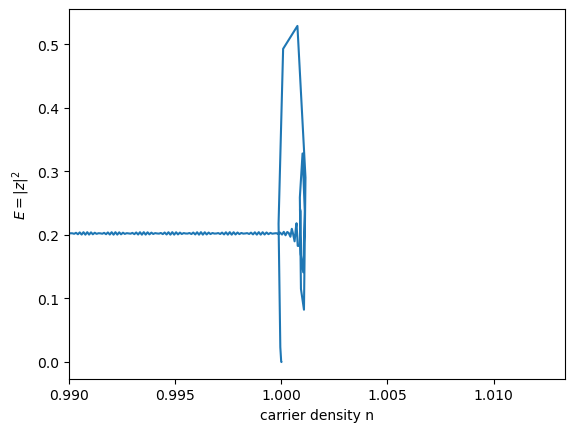

In [166]:
plt.plot(sol.y[1,:],abs(sol.y[0,:])**2)  # n vs |u| 
plt.xlim(0.99,)
plt.xlabel('carrier density n')
plt.ylabel('$E=|z|^2$')

Text(0, 0.5, '$E=|z|^2$')

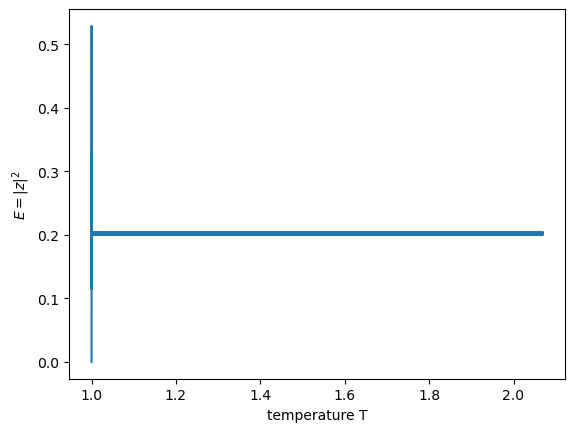

In [172]:
plt.plot(sol.y[2,:],abs(sol.y[0,:])**2)  # n vs |u| 
plt.xlabel('temperature T')
plt.ylabel('$E=|z|^2$')

Text(0, 0.5, '$E=|z|^2$')

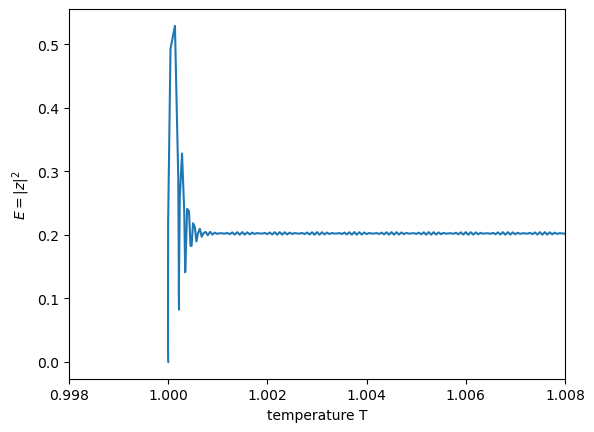

In [182]:
plt.plot(sol.y[2,:],abs(sol.y[0,:])**2)  # n vs |u| 
plt.xlim(0.998,1.008)
plt.xlabel('temperature T')
plt.ylabel('$E=|z|^2$')

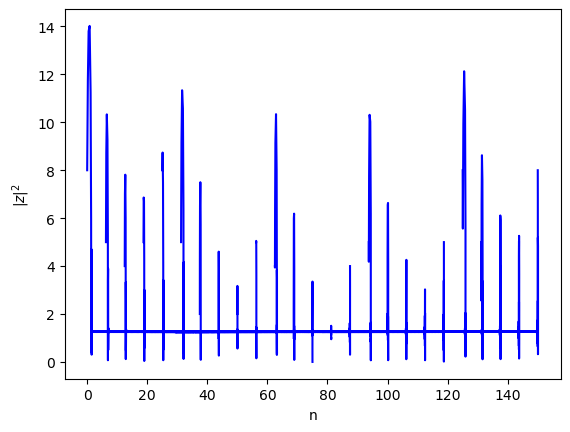

In [192]:
# phase diagram E vs n
Delta=400
u=50
#random initial points 
n0=np.linspace(0,150,25)
T0=0*np.ones(25)
z0=[]
for i in range(-2,3):
    for j in range (-2,3):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
#print(len(y0_list)) #25
t_span=[0,1000]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.show()

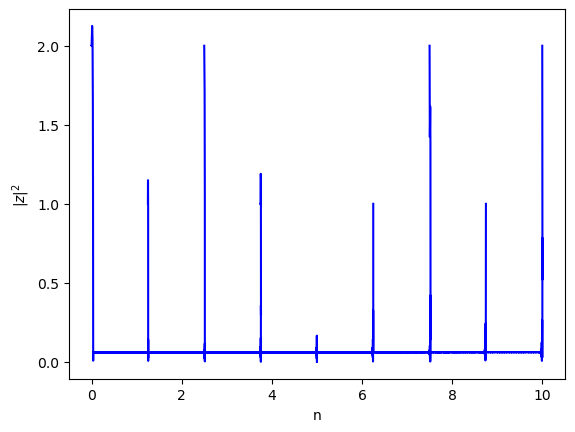

In [305]:
# phase diagram E vs n, T positive 
Delta=400
u=50
#random initial points 
n0=np.linspace(0,10,9)
T0=1*np.ones(9)
z0=[]
for i in range(-1,2):
    for j in range (-1,2):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
#print(len(y0_list)) 
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.show()

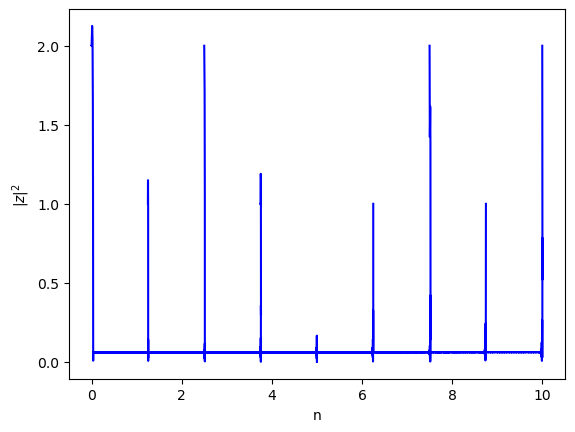

In [307]:
# phase diagram E vs n, T negative 
Delta=400
u=50
#random initial points 
n0=np.linspace(0,10,9)
T0=-1*np.ones(9)
z0=[]
for i in range(-1,2):
    for j in range (-1,2):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
#print(len(y0_list)) 
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.show()

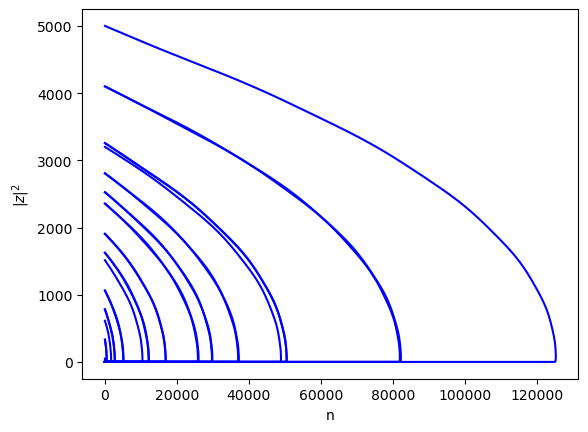

In [315]:
# phase diagram E vs n, with bigger z initial 
Delta=400
u=100
#random initial points 
n0=np.linspace(0,10,25)
T0=0*np.ones(25)
z0=[]
for i in np.linspace(-40,50,5):
    for j in np.linspace(-40,50,5):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
#print(len(y0_list)) 
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.show()

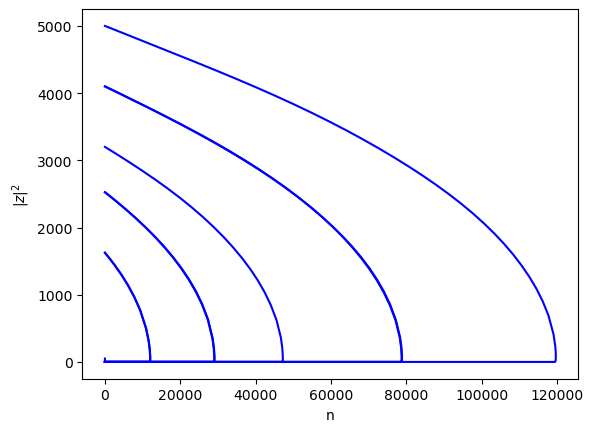

In [351]:
# phase diagram E vs n
Delta=-400
u=10
#random initial points 
n0=np.linspace(0,10,9)
T0=0*np.ones(9)
z0=[]
for i in np.linspace(-40,50,3):
    for j in np.linspace(-40,50,3):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
#print(len(y0_list)) 
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.show()

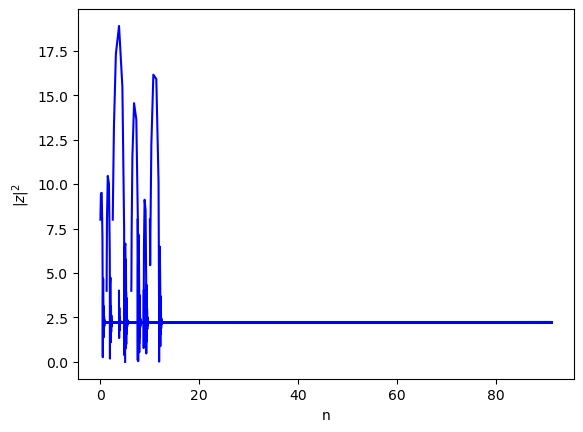

In [362]:
Delta=-400
u=300
#random initial points 
n0=np.linspace(0,10,9)
T0=0*np.ones(9)
z0=[]
for i in np.linspace(-2,2,3):
    for j in np.linspace(-2,2,3):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
#print(len(y0_list)) 
t_span=[0,1200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.show()

phase diagram E vs T

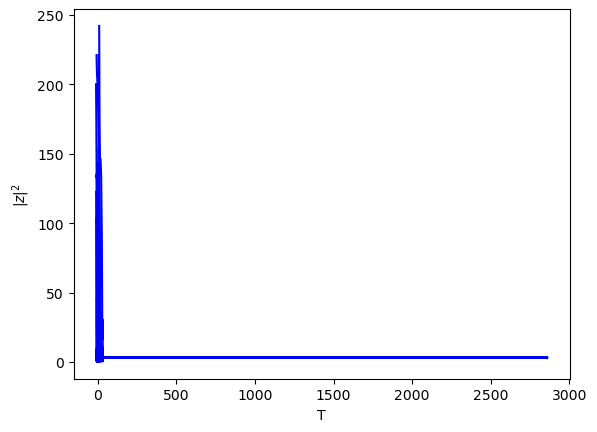

In [364]:
# phase diagram E vs T: short t_span
Delta=-400
u=350
#random initial points 
n0=0*np.ones(25)
T0=np.linspace(-10,10,25)
z0=[]
for i in np.linspace(-10,11,5):
    for j in np.linspace(-10,11,5):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
res_z=[]
res_n=[]
res_T=[]
#print(len(y0_list)) #25
t_span=[0,1200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[2,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('T')
plt.show()

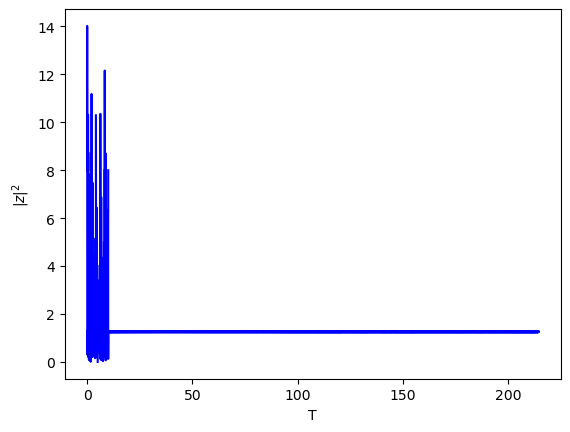

In [212]:
# phase diagram E vs T: long t_span
Delta=400
u=50
#random initial points 
n0=0*np.ones(25)
T0=np.linspace(0,10,25)
z0=[]
for i in range(-2,3):
    for j in range (-2,3):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
#print(len(y0_list)) #25
t_span=[0,1200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[2,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('T')
plt.show()

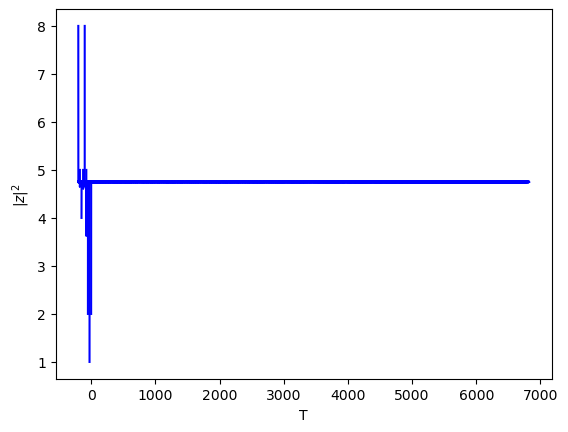

In [303]:
# phase diagram E vs T, with negative T0 
Delta=0
u=60
#random initial points 
n0=0*np.ones(9)
T0=np.linspace(-200,0,9)
z0=[]
for i in range(-2,3):
    for j in range (-2,3):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0,T0))
#print(len(y0_list)) #25
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    plt.plot(ys.y[2,:],abs(ys.y[0,:])**2,'b')

plt.ylabel('$|z|^2$')
plt.xlabel('T')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (216,) + inhomogeneous part.

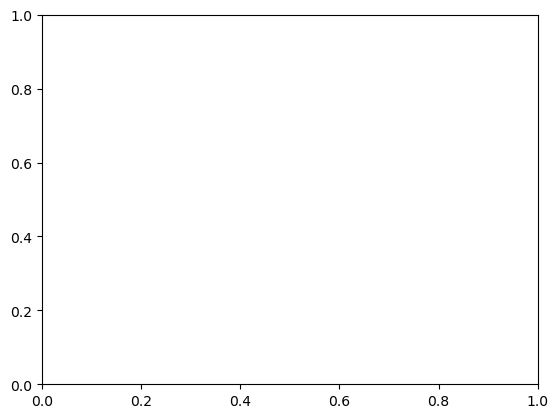

In [323]:
## all n0, z0, t0 in the same range 
Delta=-300
u=50
ic = np.linspace(-3, 3, 6)
y0_list=[]
res_z=[]
res_n=[]
res_T=[]
for r in ic:
    for s in ic:
        for t in ic:
            y0_list.append( [r+0j, s+0j,t+0j])
t_span=[0,1200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    res_z.append(abs(ys.y[0,:])**2)
    res_n.append(ys.y[1,:])
    res_T.append(ys.y[2,:])


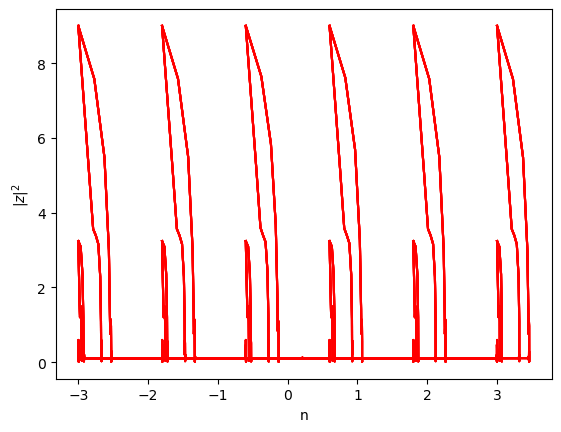

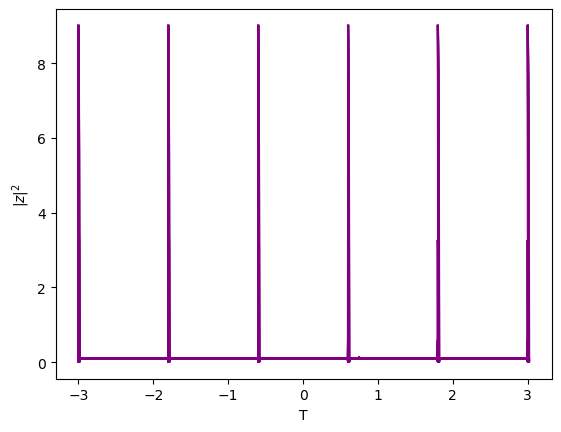

In [343]:
for i in range (0, len(res_z)):
    plt.plot(res_n[i],res_z[i],color='red')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.show()
for i in range (0, len(res_z)):
    plt.plot(res_T[i],res_z[i],color='purple')
plt.ylabel('$|z|^2$')
plt.xlabel('T')
plt.show()

In [385]:
## all n0, z0, t0 in the same range 
Delta=-300
u=150
ic = np.linspace(-3, 3, 6)
y0_list=[]
res_z=[]
res_n=[]
res_T=[]
for r in ic:
    for s in ic:
        for t in ic:
            y0_list.append( [r+0j, s+0j,t+0j])
t_span=[0,1200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    ys = solve_ivp(CMT3, t_span, i, args=m)
    res_z.append(abs(ys.y[0,:])**2)
    res_n.append(ys.y[1,:])
    res_T.append(ys.y[2,:])


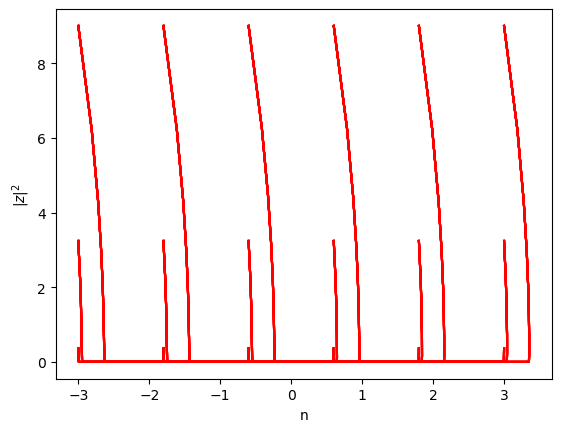

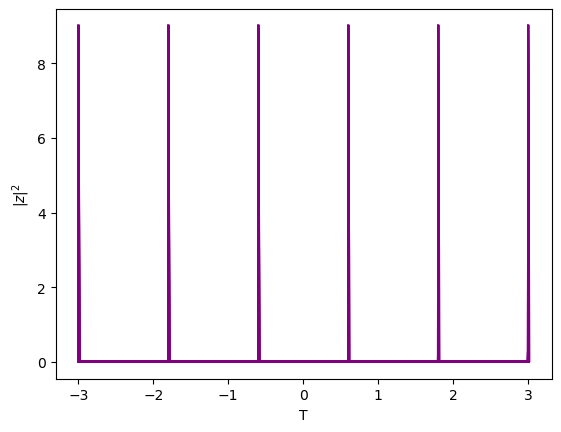

In [388]:
for i in range (0, len(res_z)):
    plt.plot(res_n[i],res_z[i],color='red')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.show()
for i in range (0, len(res_z)):
    plt.plot(res_T[i],res_z[i],color='purple')
plt.ylabel('$|z|^2$')
plt.xlabel('T')
plt.show()

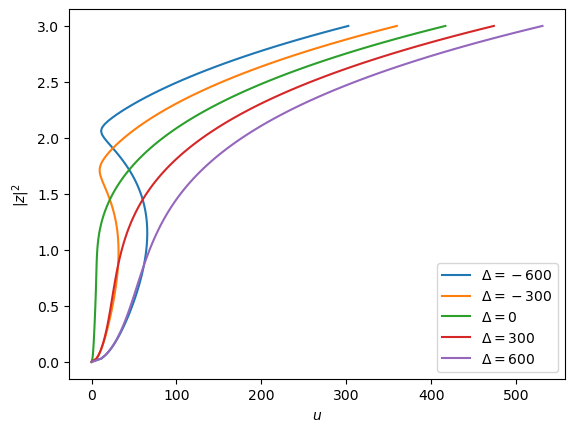

In [366]:
from scipy.integrate import complex_ode
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
#import cmath
import math

def CMT3(t,Y,Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta):
    z = Y[0]
    n = Y[1]
    T = Y[2]
    dzdt = -(k_T/2+1j*(Delta+chi*abs(z)**2))*z-math.sqrt(k)*u 
    +1j*(n+sigma_FCD*n**0.8-T)*z - (gamma_TPA*abs(z)**2+gamma_FCA*n)*z
    dndt = abs(z)**4-n/tau
    dTdt = xi_T*abs(z)**2*(eta_lin*eta_c + 2*gamma_TPA*abs(z)**2 + 2*gamma_FCA*n) - T/tao_theta
    return [dzdt, dndt, dTdt]

chi = 0.55
tau=18.5
k_l=50 * abs(chi)
k = 150 * abs(chi)
k_T=k+k_l
Delta_th= -math.sqrt(3)/2.0 * k_T
gamma_TPA=0.11
gamma_FCA=0.2
sigma_FCD=7.2

xi_T=0.074;
eta_lin=0.4;
eta_c=1;
tao_theta=185;

# bistability
lower_limit = 0
upper_limit = 3
num_pts = 100
E = np.linspace(lower_limit, upper_limit, num_pts)
Delta_range=np.arange(-600,610,300)
for j in Delta_range:
    u_list=[]
    for i in E:
        #print('stable n is: {:.5f}'.format(18.5*abs(i)**2 ))
        P = ((k_T/2 + gamma_TPA*i + gamma_FCA * (tau*i**2 ))**2 + 
             (j + chi*i+ tao_theta* xi_T*i*(eta_lin*eta_c+2*gamma_TPA*i + 2*gamma_FCA*tau*i**2) -tau*i**2-sigma_FCD*(tau*i**2 )**0.8)**2)*i/k
        u_list.append(math.sqrt(P))
    plt.plot(u_list,E,label='$\Delta = {} $'.format(j))

plt.xlabel('$u$')
plt.ylabel('$|z|^2$')
#plt.xlim(0,100)
plt.legend()


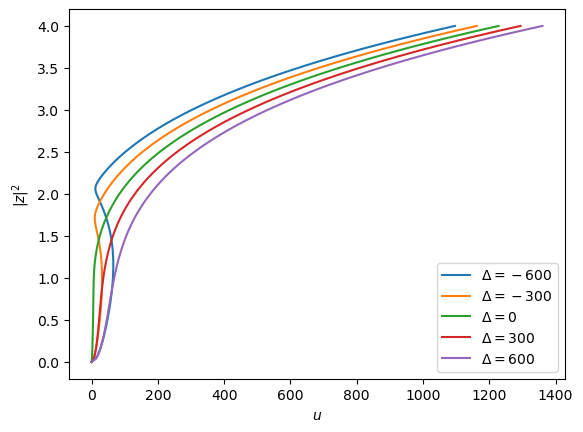

In [380]:
# bistability
lower_limit = 0
upper_limit = 4
E = np.linspace(lower_limit, upper_limit, num_pts)
Delta_range=np.arange(-600,610,300)
for j in Delta_range:
    u_list=[]
    for i in E:
        #print('stable n is: {:.5f}'.format(18.5*abs(i)**2 ))
        P = ((k_T/2 + gamma_TPA*i + gamma_FCA * (tau*i**2 ))**2 + 
             (j + chi*i+ tao_theta* xi_T*i*(eta_lin*eta_c+2*gamma_TPA*i + 2*gamma_FCA*tau*i**2) -tau*i**2-sigma_FCD*(tau*i**2 )**0.8)**2)*i/k
        u_list.append(math.sqrt(P))
    plt.plot(u_list,E,label='$\Delta = {} $'.format(j))

plt.xlabel('$u$')
plt.ylabel('$|z|^2$')
#plt.xlim(0,100)
plt.legend()

[-2.31778432e-01-1.2824177j  5.36207417e+01+0.j
  5.17848047e+02+0.j       ]
Time elapse: 11.3 min


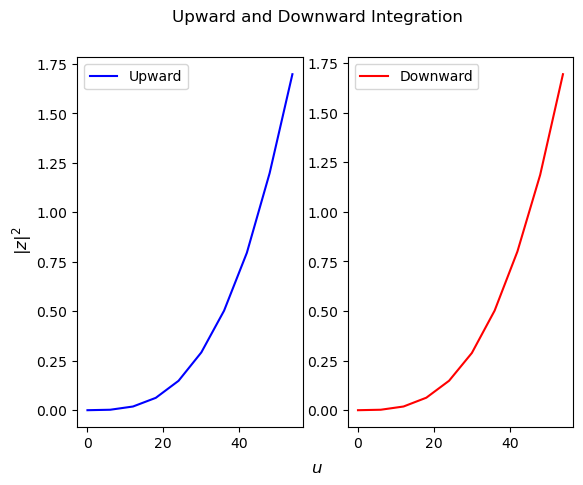

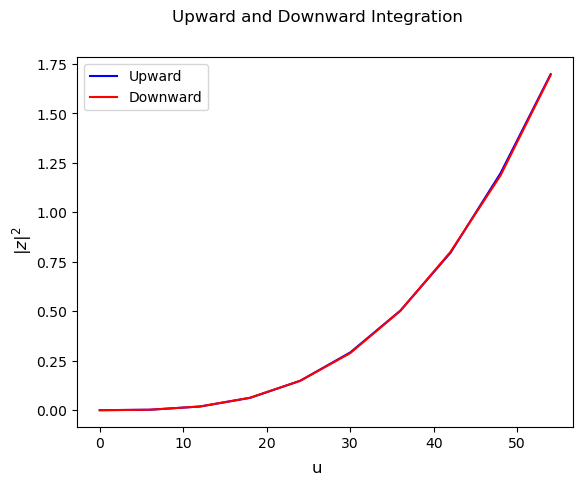

In [247]:
### As shown above, there should be split at around u=30.
### This time, the analytical method and numerical results are totally different. As u increase till 60, there was still no bistability.
Delta=-300
u=np.arange(0,60,6)
y0 = [0+0j, 1+0j,1]
t_span=[0,1500]

forward=[]
backward=[]
start = time.time()
# from u=0 to high input power
for k in u: 
    parameter=[Delta,k,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    # get stablilized z and n
    ans=solve_ivp(CMT3,t_span,y0,args=parameter)
    forward.append(abs(ans.y[0,-1])**2) # append the stabilized |z|**2
end=ans.y[:,-1]
print(end)
# from high input power down to 0 
for k in list(reversed(u)): 
    parameter=[Delta,k,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    # get stablilized z and n
    ans=solve_ivp(CMT3,t_span,end,args=parameter)
    
    backward.append(abs(ans.y[0,-1])**2) # append the stabilized |z|**2

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Upward and Downward Integration')
ax1.plot(u, forward,'b',label='Upward')  
ax2.plot(list(reversed(u)), backward,'r',label='Downward')
ax1.legend()
ax2.legend()
fig.supxlabel('$u$')
fig.supylabel('$|z|^2$')

fig_new,ax3=plt.subplots()
fig_new.suptitle('Upward and Downward Integration')
ax3.plot(u, forward,'b',label='Upward')  
ax3.plot(list(reversed(u)), backward,'r',label='Downward')
ax3.legend()
fig_new.supxlabel('u')
fig_new.supylabel('$|z|^2$')
end = time.time()
print('Time elapse: {:.1f} min'.format((end - start)/60))

(8.750970325272615e-06+0j)
(0.0160905879548429+0j)
(0.40873349072352344+0j)
(3.310488202924972+0j)
(15.605093079585783+0j)
(53.620733354045605+0j)
(149.82618114430966+0j)
(362.0696985835113+0j)
(786.3166207173792+0j)
(1574.4987604237942+0j)
[-5.58382038e-01-2.97913144j  1.57449876e+03+0.j
  7.97242485e+04+0.j        ]
(1574.4956562476195+0j)
(786.3154740046182+0j)
(362.0709835027084+0j)
(149.82617860184624+0j)
(53.62087398315739+0j)
(15.604948936859202+0j)
(3.310500482031284+0j)
(0.40873344737824024+0j)
(0.016090554062282478+0j)
(8.751002868684162e-06+0j)
Time elapse: 8.5 min


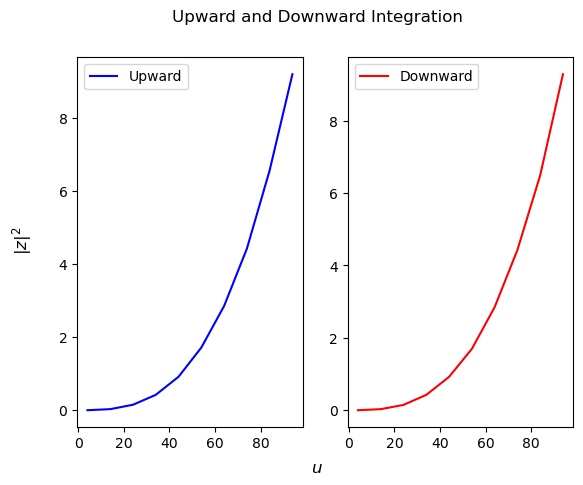

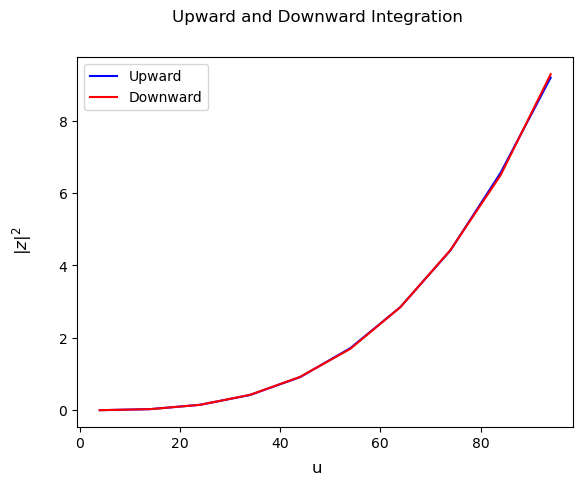

In [283]:
Delta=-300
u=np.arange(4,100,10)
y0 = [0+0j, 1+0j,1+0j]
t_span=[0,1200]

forward=[]
backward=[]
start = time.time()
# from u=0 to high input power
for k in u: 
    parameter=[Delta,k,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    # get stablilized z and n
    ans=solve_ivp(CMT3,t_span,y0,args=parameter)
    print(ans.y[1,-1])
    forward.append(abs(ans.y[0,-1])**2) # append the stabilized |z|**2
end=ans.y[:,-1]
print(end)
# from high input power down to 0 
for k in list(reversed(u)): 
    parameter=[Delta,k,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    # get stablilized z and n
    ans=solve_ivp(CMT3,t_span,end,args=parameter)
    print(ans.y[1,-1])
    backward.append(abs(ans.y[0,-1])**2) # append the stabilized |z|**2

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Upward and Downward Integration')
ax1.plot(u, forward,'b',label='Upward')  
ax2.plot(list(reversed(u)), backward,'r',label='Downward')
ax1.legend()
ax2.legend()
fig.supxlabel('$u$')
fig.supylabel('$|z|^2$')

fig_new,ax3=plt.subplots()
fig_new.suptitle('Upward and Downward Integration')
ax3.plot(u, forward,'b',label='Upward')  
ax3.plot(list(reversed(u)), backward,'r',label='Downward')
ax3.legend()
fig_new.supxlabel('u')
fig_new.supylabel('$|z|^2$')
end = time.time()
print('Time elapse: {:.1f} min'.format((end - start)/60))

[  0  30  60  90 120 150 180 210 240 270 300 330 360 390]
T (0.0015239128568079485+0j)
T (4.322496565618272+0j)
T (1326.4078330554419+0j)
T (53266.611736178405+0j)
T (805358.9540802848+0j)
T (7716182.517802072+0j)
T (68604502.55904475+0j)
T (38542532306.08024+0j)
T (45808853092.90569+0j)
T (53861806417.03825+0j)
T (62790704473.03843+0j)
T (72666737081.41267+0j)
T (83560004674.00725+0j)
T (95530690569.00085+0j)
[-6.95580806e+00+30.66784101j  1.78084490e+07 +0.j
  9.55306906e+10 +0.j        ]
T (95692454187.04158+0j)
T (83721129294.11542+0j)
T (72827079695.86797+0j)
T (62950369157.685936+0j)
T (54020742538.94639+0j)
T (45967144767.21913+0j)
T (38700085416.45099+0j)
T (32072882338.95386+0j)
T (25785158708.882793+0j)
T (146729489.20274916+0j)
T (145773863.0685993+0j)
T (145626326.95585015+0j)
T (145590668.174329+0j)
T (145585789.4383244+0j)
Time elapse: 17.7 min


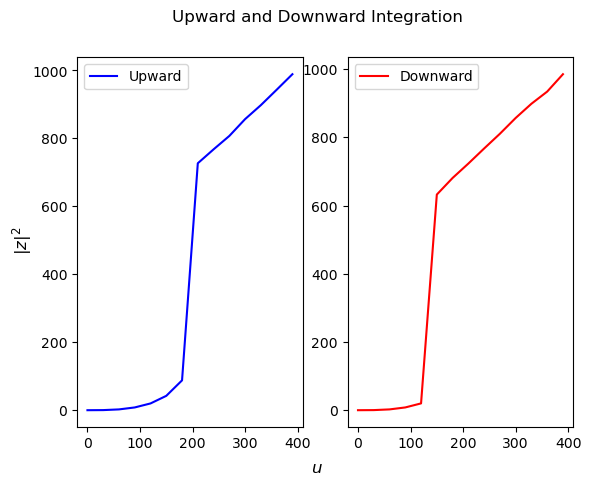

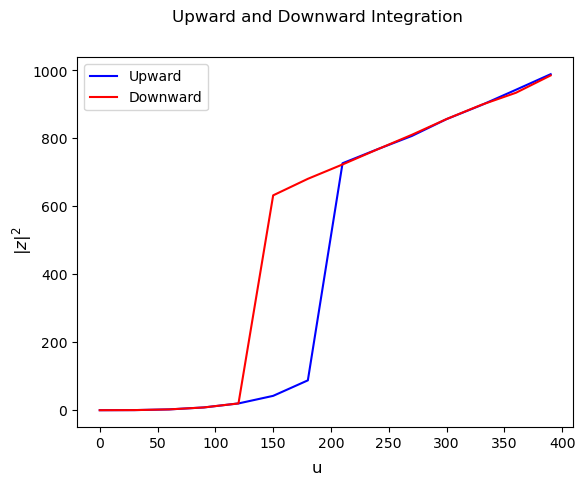

In [384]:
Delta=-300
u=np.arange(0,400,30)
print(u)
y0 = [0+0j, 1+0j,1+0j]
t_span=[0,1200]

forward=[]
backward=[]
start = time.time()
# from u=0 to high input power
for k in u: 
    parameter=[Delta,k,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    # get stablilized z and n
    ans=solve_ivp(CMT3,t_span,y0,args=parameter)
    print('T',ans.y[2,-1])
    forward.append(abs(ans.y[0,-1])**2) # append the stabilized |z|**2
end=ans.y[:,-1]
print(end)
# from high input power down to 0 
for k in list(reversed(u)): 
    parameter=[Delta,k,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
    # get stablilized z and n
    ans=solve_ivp(CMT3,t_span,end,args=parameter)
    print('T',ans.y[2,-1])
    backward.append(abs(ans.y[0,-1])**2) # append the stabilized |z|**2

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Upward and Downward Integration')
ax1.plot(u, forward,'b',label='Upward')  
ax2.plot(list(reversed(u)), backward,'r',label='Downward')
ax1.legend()
ax2.legend()
fig.supxlabel('$u$')
fig.supylabel('$|z|^2$')

fig_new,ax3=plt.subplots()
fig_new.suptitle('Upward and Downward Integration')
ax3.plot(u, forward,'b',label='Upward')  
ax3.plot(list(reversed(u)), backward,'r',label='Downward')
ax3.legend()
fig_new.supxlabel('u')
fig_new.supylabel('$|z|^2$')
end = time.time()
print('Time elapse: {:.1f} min'.format((end - start)/60))

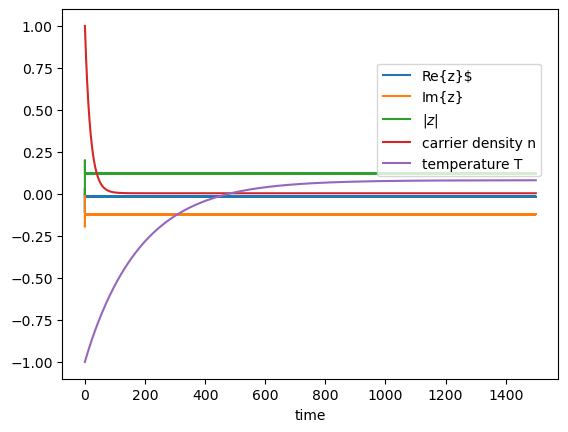

In [261]:
y0 = [0+0j, 1+0j,-1]
t_span=[0,1500]

# test 
u=20
m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
sol=solve_ivp(CMT3, t_span, y0, args=m)
plt.plot(sol.t, sol.y[0,:].real,label='Re{z}$')
plt.plot(sol.t, sol.y[0,:].imag,label='Im{z}')
plt.plot(sol.t, abs(sol.y[0,:]),label='$|z|$')
plt.plot(sol.t, sol.y[1,:],label='carrier density n')
plt.plot(sol.t, sol.y[2,:],label='temperature T')
plt.xlabel('time')
plt.legend(loc='center', bbox_to_anchor=(0.8, 0.7))
plt.show()

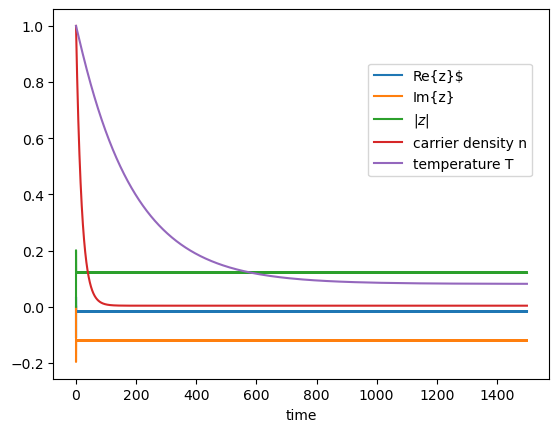

In [263]:
y0 = [0+0j, 1+0j,1]
t_span=[0,1500]

# test 
u=20
m=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
sol=solve_ivp(CMT3, t_span, y0, args=m)
plt.plot(sol.t, sol.y[0,:].real,label='Re{z}$')
plt.plot(sol.t, sol.y[0,:].imag,label='Im{z}')
plt.plot(sol.t, abs(sol.y[0,:]),label='$|z|$')
plt.plot(sol.t, sol.y[1,:],label='carrier density n')
plt.plot(sol.t, sol.y[2,:],label='temperature T')
plt.xlabel('time')
plt.legend(loc='center', bbox_to_anchor=(0.8, 0.7))
plt.show()

In [1]:
### numerical bistability range checking
from scipy.integrate import complex_ode
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
#import cmath
import math
import time

def CMT3(t,Y,Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta):
    z = Y[0]
    n = Y[1]
    T = Y[2]
    dzdt = -(k_T/2+1j*(Delta+chi*abs(z)**2))*z-math.sqrt(k)*u 
    +1j*(n+sigma_FCD*n**0.8-T)*z - (gamma_TPA*abs(z)**2+gamma_FCA*n)*z
    dndt = abs(z)**4-n/tau
    dTdt = xi_T*abs(z)**2*(eta_lin*eta_c + 2*gamma_TPA*abs(z)**2 + 2*gamma_FCA*n) - T/tao_theta
    return [dzdt, dndt, dTdt]

chi = 0.55
tau=18.5
k_l=50 * abs(chi)
k = 150 * abs(chi)
k_T=k+k_l
Delta_th= -math.sqrt(3)/2.0 * k_T
gamma_TPA=0.11
gamma_FCA=0.2
sigma_FCD=7.2

xi_T=0.074;
eta_lin=0.4;
eta_c=1;
tao_theta=185;

u_list=np.arange(0,350,20)
u_new=list(reversed(u_list))
Delta_list=np.arange(-400,410,50)
y0=[0+0j, 1+0j,1+0j]
t_span=(0,1200)
forward=[[0]*len(u_list) for i in range(len(Delta_list))]
backward=[[0]*len(u_list) for i in range(len(Delta_list))]

start=time.time()
for i in range (len(Delta_list)): 
    Delta=Delta_list[i]
    for j in range (len(u_list)):       
        u=u_list[j]
        parameter=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
        ans=solve_ivp(CMT3,t_span,y0,args=parameter)
        forward[i][j]=abs(ans.y[0,-1])**2
    end=ans.y[:,-1]
    #print(end)
# from high input power down to 0 
    for k in range(len(u_new)): 
        u=u_new[k]
        parameter=[Delta,u,chi,tau,k_T,gamma_TPA,gamma_FCA,sigma_FCD, xi_T,eta_lin,eta_c,tao_theta]
        ans=solve_ivp(CMT3,t_span,end,args=parameter)
        backward[i][k]=abs(ans.y[0,-1])**2 # append the stabilized |z|**2

end = time.time()
print('Time elapse: {:.1f} min'.format((end - start)/60))
for j in range (len(u_list)):
    ## use array 
    #temp1=np.array(forward)
    #temp2=np.array(backward)
    #print(temp1[:,j])
    #plt.plot(Delta_list, temp1[:,j],Delta, temp2[:,j], label='u={}'.format(u_list[j])) 
    ## use list
    plt.plot(Delta_list, [x[j] for x in forward],Delta_list, [x[j] for x in backward], label='u={}'.format(u_list[j])) 

plt.legend()
plt.xlabel('$\Delta$')
plt.ylabel('$|z|^2$')


NameError: name 'start' is not defined

Text(0, 0.5, '$|z|^2$')

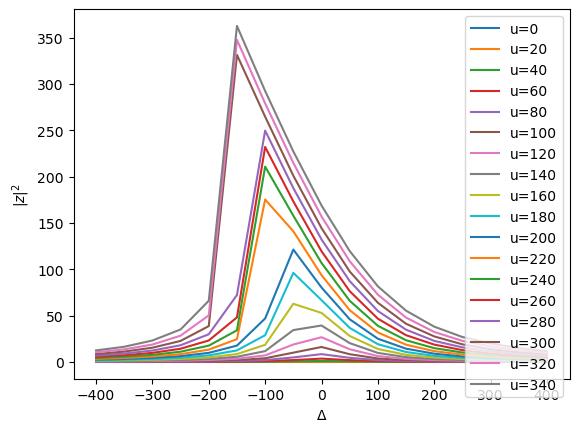

In [29]:
for j in range (len(u_list)):
    ## use array 
    #temp1=np.array(forward)
    #temp2=np.array(backward)
    #print(temp1[:,j])
    #plt.plot(Delta_list, temp1[:,j],Delta, temp2[:,j], label='u={}'.format(u_list[j])) 
    ## use list
    plt.plot(Delta_list, [x[j] for x in forward],'-', label='u={}'.format(u_list[j])) 

plt.legend()
plt.xlabel('$\Delta$')
plt.ylabel('$|z|^2$')


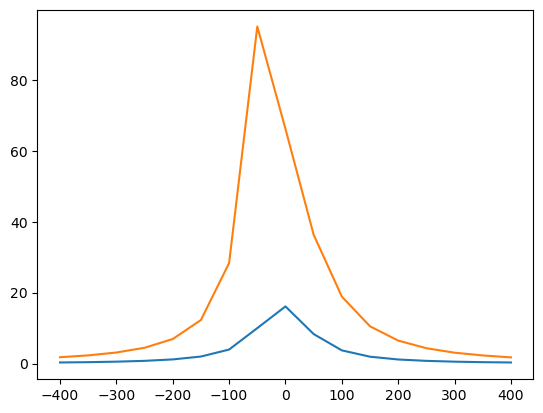

In [23]:
plt.plot(Delta_list, [x[5] for x in forward],'-',Delta_list, [x[5] for x in backward], '-', label='u={}'.format(u_list[j])) 

In [33]:
import pandas as pd
data = pd.DataFrame(forward)  
# storing into the excel file 
data.to_excel("forward.xlsx")
data2=pd.DataFrame(backward)
data2.to_excel('backward.xlsx')